
<a id='TOC'></a>

<div class="alert alert-block alert-success">
    
# Table of contents
* <a href='#1.'> 1. Learning Objectives</a>
* <a href='#2.'> 2. Introduction </a>
* <a href='#3.'> 3. Sanding Task </a>
* <a href='#4.'> 4. Code Structure and Files </a>
* <a href='#5.'> 5. Tasks </a>
* <a href='#6.'> 6. Implementation requirements </a>
* <a href='#7.'> 7. Evaluation / grading </a>
* <a href='#8.'> 8. Start the project </a>

# 1. Learning Objectives <a id='1.'></a>
In the project work, students move to a more independent working style compared with the exercises. In the exercises, instructions and template code for reinforcement learning algorithms were provided. However, in the project work the students are given **a new task** that they need to solve using reinforcement learning methods discussed during the course. The students need to decide which method they will use (either PPO or DPDG), extend the method, and explain why. Students may take advantage of code that they have already developed in the exercises or which was part of the exercises.


# 2. Introduction <a id='2.'></a>

The goal of the project work is to optimize the behavior of a sanding robot using reinforcement learning such that the robot avoids already painted areas but sands areas that need sanding. We give now a general motivation and task description. [Section 3](#3.) provides a more detailed task definition.

<center>
<figure style="display: inline-block; text-align: center; margin: 10px;">
  <img src="imgs/robot_sanding.png" width="width:40%"/>
</figure>
</center>
<center>Figure 1: Illustration of a robot sanding a planar area. Image source: (https://www.youtube.com/watch?v=TG-3NZzoZiM)</center>

The robot operates on a 2-D plane and should hit a set of "sanding areas" using the sanding tool equipped. At the same time the robot has to avoid specific "painted areas" which are also defined as part of the system state. The sanding areas and painted areas are defined as part of the state space. The robot gets a negative reward for hitting painted areas and a positive reward for sanding sanding areas.

The idea is to optimize the behavior of the robot using reinforcement learning based on DDPG algorithm. You should extend DDPG such that you get higher performance in the more challenging versions of the sanding task.

[Section 3](#3.) defines the sanding task. [Section 4](#4.) shows the structure of the provided file directory. [Section 5](#5.) discusses the **mandatory project requirements** and **possible extensions** to the basic DDPG algorithms. [Section 6](#6.) discusses the implementation requirements. [Section 7](#7.a) describes how the project is evaluated and graded. In [Section 8](#8.), you will add your implementation, perform the tasks and answer questions. [Section 9](#9.) is a preliminary check. In [Section 10](#10.), you can provide feedback on the project work.

# 3. Sanding Task <a id='3.'></a>
The primary objective in this project is to optimize a sanding robot's behavior, aiming to maximize the expected cumulative reward $ J(\theta) = \mathbb{E}_{\pi_{\theta}}\left[ \sum_{t=0}^{\infty} \gamma^t r_t \right] $. The simulator for the sanding task is provided in the "sanding.py" Python file. This section defines the sanding task. Please, see below.

## 3.1. Markov Decision Process (MDP)
- **Robot Characteristics**: The robot is visualized as a <span style="color:purple">purple</span> circle with a radius of 10, operating on a 2D plane. The x and y coordinates range from -50 to 50.
- **Sanding & No-Sanding Areas**: There are sanding (<span style="color:green">green</span>) and no-sanding (<span style="color:red">red</span>) areas, each with a radius of 10. Their configurations vary based on the task.
  
### 3.1.1. State Representation
A state \( s \) is defined as:

$s = [(x_{\text{ROBOT}}, y_{\text{ROBOT}}), (x_{\text{SAND}}, y_{\text{SAND}})_1, \dots,
    (x_{\text{SAND}}, y_{\text{SAND}})_N, (x_{\text{NOSAND}}, y_{\text{NOSAND}})_1, \dots,
    (x_{\text{NOSAND}}, y_{\text{NOSAND}})_M)]$

- $N$ is the number of sanding areas (circles)
- $M$ is the number of no-sanding areas (circles)
- $(x_{\text{ROBOT}}, y_{\text{ROBOT}})$ : Robot's current location
- $(x_{\text{SAND}}, y_{\text{SAND}})_i$: Location of the $i$th sanding area
- $(x_{\text{NOSAND}}, y_{\text{NOSAND}})_j$: Location of the $j$th no-sanding area

### 3.1.2. Action Space

An action $a$ consists of target coordinates for the robot:

$a = (a_x, a_y) \in \mathbb{R}^2$

$a_x, a_y$ selects the current target coordinates of the robot arm. A PD-controller~\cite{X} trys to move the robot arm from the current coordinates $(x_{\text{ROBOT}}, y_{\text{ROBOT}})$ to the target coordinates $a_x, a_y$. You do not need to necessarily understand how exactly the PD-controller works but the controller may not always move the robot to the correct coordinates in one time step, and, it may also overshoot the target location. Please, see below for a visualization of this behavior.


### 3.1.3. Reward definition

The reward is defined as the number of sanding locations the robot touches minus the number of no-sanding locations the robot touches, that is,
$r_t = $ number of sanded sanding locations - number of sanded no-sanding locations .

The robot can only sand a sanding or no-sanding location once. All sanding and no-sanding locations that are touched by the robot will be moved outside the operating area, that is, those locations will be outside the operating area in the subsequent time step.


## 3.2 Scenarios with different difficulty levels: <a id='3.1'></a>


### Environment Breakdown
#### Environment 1: Easy Environment

<p align="center">
  <figure style="display:inline-block; text-align: center; margin: 10px;">
    <img src="imgs/easy_env.gif" alt="Easy Environment" width="180"/>
  </figure>
</p>

- **No-Sanding Spots**: 1 (<span style="color:red">red</span>), fixed location in the center
- **Sanding Spots**: 1 (<span style="color:green">green</span>), randomly generated without overlapping
- **PD Control**: Movement to target \((a_x, a_y)\) with random number of PD iterations
- **Notes**: Hollow circle indicates target, <span style="color:purple">purple</span> circle is the robot

#### Environment 2: Moderate Difficulty Environment
<p align="center">
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/middle_env.gif" alt="Easy Environment" width="180"/>
  </figure>
</p>

- **No-Sanding Spots**: 2 (<span style="color:red">red</span>), fixed locations along the diagonal
- **Sanding Spots**: 2 (<span style="color:green">green</span>), randomly generated without overlapping
- **Control**: Movement to target \((a_x, a_y)\) with random number of PD iterations
- **Notes**: Hollow circle indicates target, <span style="color:purple">purple</span> circle is the robot

#### Environment 3: Difficult Environment
<p align="center">
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/difficult_env.gif" alt="Easy Environment" width="180"/>
  </figure>
</p>

- **No-Sanding Spots**: 4 (<span style="color:red">red</span>), fixed locations as a square
- **Sanding Spots**: 4 (<span style="color:green">green</span>), one of which is fixed in the center while other three are ramdomly generated without overlapping
- **Control**: Movement to target \((a_x, a_y)\) with random number of PD iterations
- **Notes**: Hollow circle indicates target, <span style="color:purple">purple</span> circle is the robot

# 4 Code Structure & Files <a id='4.'></a>

```project.ipynb``` is the main file needed to be modified for this project, but you can also add other auxiliary files if needed.  
```
├───cfg
│   ├───algo                       # Algorithm configurations
│   ├───envs                       # Environment configurations
├───imgs                           # Images used in the notebook task description
├───utils                          # Utility functions
├───algo                           # Your agents DDPG
├───results                        # Training results
├───project.ipynb                  
└───sanding.py                     # Sanding environment

```

# 5. Tasks <a id='5.'></a>

## Task 1: Implement DDPG

Implement the DDPG algorithm to solve the sanding task. You can use the provided DDPG implementation in the "algo/ddpg.py" file.

## Task 2: possible extensions to improve perfromance

After the basic DDPG implementation, you shall try to do some technical improvements to improve the agent's performance. Below we list several possible extensions you can apply to improve the perfromance.
- <span style="color:red">If you choose to implement DDPG, for task 2 you can choose either LNSS or Self imitation learning</span>
- <span style="color:red">You should read the paper to do your own implementation and answer the related questions in Student Questions 1.</span>
- <span style="color:red">The codes shall be implemented in "algo/ddpg_extension.py" </span>


### DDPG based Extension: **LNSS**
- Implement it if your base algorithm is DDPG.
- Its core idea is to improve N-step bootstrapping for off-policy RL like DDPG. It was empirically suggested that n-step methods perform better than single-step methods since n-step returns propagate rewards to relevant state-action pairs more efficientlyy.
- Ref([Junmin et al., 2023](https://proceedings.neurips.cc/paper_files/paper/2023/file/29ef811e72b2b97cf18dd5d866b0f472-Paper-Conference.pdf)).

### General Extension: **Self imitation learning**
- <span style="color:red">Either you implemented PPO or DDPG, you can choose to implement it instead of Dual Clip PPO or LN</span>
- If you want to try a more general trick that can be used for any RL, you can implement self-imitatin learning.
- It exploits past good experiences to drive deep exploration.
- Ref:([Oh et al., 2018](https://proceedings.mlr.press/v80/oh18b.html)).




# <span> 6. Implementation requirements </span> <a id='6.'></a>

### <span> Your implemented algorithm must be compatible with the below requirements. This is the default behavior, however make sure not to disrupt it.</span>

## I. <span style="color:red"> Data Saving Format

### a) Training Logs:
During the training, your code shall create a CSV file as the training log.

  - This log should output a CSV file with the following format:
    ```
    ,episode_length,ep_reward,episodes,total_step,average_return
    0,20,0.0,99,2000,-0.13
    1,20,0.0,199,4000,0.02
    ...
    ```
  - The training log should be saved as:
    `results/<environment name>/<algorithm name>/logging/logs_<seed number>.csv`
    
    For example:
    `results/SandingEnvDifficult/ddpg/logging/logs_0.csv`
    

### b) Model Weights

During/after training, the policy/critic weights should be saved in the path:

  `results/<environment name>/<algorithm name>/model/model_parameters_<seed number>.pt`
  
  For example:
  
  `results/SandingEnvDifficult/ddpg/model/model_parameters_0.pt`




## II. <span style="color:red"> Visualization Plot Functions

Ensure that your implemented algorithm is compatible with the functions located in `utils/common_utils.py`:

- **Single Training Curve**:
  - Function: `plot_reward(path, seed, env_name)`
  - Description: Plots the training curve of a single algorithm, trained with a specific seed.
  
- **Multiple Training Curves**:
  - Function: `plot_algorithm_training(path, seeds, env_name)`
  - Description: Plots the training curves of a single algorithm, trained with multiple specific random seeds.
  - Example: `seeds=[0,1,2]`
  
- **Comparison of Training Performances**:
  - Function: `compare_algorithm_training(algo1, algo2, seeds)`
  - Description: Given two configured algorithms/agents, this function will generate comparison plots of their training performances.


## III. <span style="color:red"> Configurations </span>

We provide the hyperparameters in 'cfg/algo', use those configuration files to initialize your agent. Example refer to following code. You should not change any parameters there.

**Usage Example**:
```python
config = setup(algo='ppo', env='middle')
    config["seed"] = 0
    agent = PPOAgent(config)
```

## IV. <span style="color:red"> Training implementation </span>

To ensure compatibility with the setup function, your implemented algorithm must follow the specified protocol:

- **Function**: `setup(algo=None, env='easy', cfg_args={})`
  - **Purpose**: Used for setting up the configurations.
  - **Usage Example**:
    ```python
    config = setup(algo='ppo', env='middle')
    config["seed"] = 0
    agent = PPOAgent(config)
    agent.train()
    ```
  - **Parameters**:
    - `algo`: Specify the algorithm. Use either `'ppo'` or `'ddpg'`.
    - `env`: Specify the environment. Options include `'easy'`, `'middle'`, or `'difficult'`.

## V. <span style="color:red"> Test implementation </span>

To ensure compatibility with the setup function, your implemented algorithm must follow the specified protocol:

- **Function**: `test`
  - **Purpose**: Used for test the performance of the agent.
  - **Usage Example**:
    ```python
    test(agent, env_name='easy', algo_name='ddpg')
    ```


# 7. Evaluation <a id='7.'></a>

### Baseline Performance:

The following values were recorded after running experiments for the base algorithms in different environments. Differences due to random conditions are expected.

#### For DDPG:
- DDPG (Easy Environment): mean: 0.75
- DDPG (Middle Environment): mean: 1.19

# 8. Start the project <a id='8.'></a>

This section contains below all the source code including your implementation and the tasks and question that need to be filled.


In [5]:
#Make sure to change this part before submission
skip_training = False  # Set this flag to True before validation and submission

# Make sure to change the algorithm_implemented variable to the algorithm you implemented
# This variable will be used in the evaluation and will determine which environment to use
# for both the baseline and the extension

algorithm_implemented = "ddpg"

In [2]:
!unzip rl_project.zip
!pip install  imageio
!pip install gymnasium
!pip install ipdb

Archive:  rl_project.zip
   creating: algo/
  inflating: algo/agent_base.py      
  inflating: algo/ddpg_agent.py      
  inflating: algo/ddpg_extension.py  
  inflating: algo/ddpg_extension_further.py  
  inflating: algo/ddpg_utils.py      
   creating: algo/__pycache__/
  inflating: algo/__pycache__/agent_base.cpython-311.pyc  
  inflating: algo/__pycache__/agent_base.cpython-39.pyc  
  inflating: algo/__pycache__/ddpg_agent.cpython-311.pyc  
  inflating: algo/__pycache__/ddpg_agent.cpython-39.pyc  
  inflating: algo/__pycache__/ddpg_extension.cpython-39.pyc  
  inflating: algo/__pycache__/ddpg_extension_further.cpython-39.pyc  
  inflating: algo/__pycache__/ddpg_utils.cpython-311.pyc  
  inflating: algo/__pycache__/ddpg_utils.cpython-39.pyc  
   creating: cfg/
   creating: cfg/algo/
  inflating: cfg/algo/ddpg.yaml      
  inflating: cfg/algo/ddpg_extension.yaml  
  inflating: cfg/algo/ddpg_extension_further.yaml  
   creating: cfg/envs/
  inflating: cfg/envs/difficult_env.yaml  
  i

In [1]:
import yaml
import gymnasium as gym

import numpy as np
from types import SimpleNamespace as SN
from pathlib import Path
import copy
import utils.common_utils as cu
from utils.recorder import RecordVideo

# uncomment the following line to import the agent
from algo.ddpg_agent import DDPGAgent
from algo.ddpg_extension import DDPGExtension
from algo.ddpg_extension_further import DDPGExtensionFurther

In [2]:

# Function to test a trained policy
def test(agent, env_name, algo_name):
    # Load model
    agent.load_model()
    print("Testing...")
    total_test_reward, total_test_len = 0, 0
    returns = []

    cur_dir=Path().cwd()
    cfg_path= cur_dir/'cfg'
    # read configuration parameters:
    cfg={'cfg_path': cfg_path, 'algo_name': algo_name}
    env_cfg=yaml.safe_load(open(cfg_path /'envs'/f'{env_name}_env.yaml', 'r'))

    # prepare folders to store results
    work_dir = cur_dir/'results'/env_cfg["env_name"]/algo_name
    video_test_dir=work_dir/"video"/"test"
    rng = np.random.default_rng(42)

    for ep in range(agent.cfg.test_episodes):
        seed = rng.integers(low=1, high=1000)
        observation, _ = agent.env.reset(seed=int(seed))
        test_reward, test_len, done = 0, 0, False

        if ep%100==0:
            frames = []

            while not done and test_len < agent.cfg.max_episode_steps:
                action, _ = agent.get_action(observation, evaluation=True)
                observation, reward, done, truncated, info = agent.env.step(action.flatten())
                fs = agent.env.render()
                frames = frames+fs
                test_reward += reward
                test_len += 1
            total_test_reward += test_reward
            total_test_len += test_len
            returns.append(test_reward)
            cu.save_rgb_arrays_to_gif(frames, video_test_dir/('_seed_'+str(agent.seed)+'_ep_'+str(ep)+'.gif'))
        else:

            while not done and test_len < agent.cfg.max_episode_steps:
                action, _ = agent.get_action(observation, evaluation=True)
                observation, reward, done, truncated, info = agent.env.step(action.flatten())
                test_reward += reward
                test_len += 1
            total_test_reward += test_reward
            total_test_len += test_len
            returns.append(test_reward)


    print(f"Average test reward over {len(returns)} episodes: {total_test_reward/agent.cfg.test_episodes},+- {np.std(np.array(returns))}; \
        Average episode length: {total_test_len/agent.cfg.test_episodes}")
    return returns


In [3]:
# Setup: read the configurations and generate the environment.
def setup(algo=None, env='easy', cfg_args={}, render=False, train_episodes=None):
    # set the paths
    cur_dir=Path().cwd()
    cfg_path= cur_dir/'cfg'

    # read configuration parameters:
    cfg={'cfg_path': cfg_path, 'algo_name': algo}
    env_cfg=yaml.safe_load(open(cfg_path /'envs'/f'{env}_env.yaml', 'r'))
    algo_cfg=yaml.safe_load(open(cfg_path /'algo'/f'{algo}.yaml', 'r'))
    cfg.update(env_cfg)
    cfg.update(algo_cfg)
    cfg.update(cfg_args)

    # forcely change train_episodes
    if train_episodes is None:
        True
    else:
        cfg["train_episodes"] = train_episodes

    # prepare folders to store results
    work_dir = cur_dir/'results'/cfg["env_name"]/str(algo)
    model_dir=work_dir/"model"
    logging_dir=work_dir/"logging"
    video_train_dir=work_dir/"video"/"train"
    video_test_dir=work_dir/"video"/"test"
    for dir in [work_dir, model_dir, logging_dir, video_train_dir, video_test_dir]:
        cu.make_dir(dir)

    cfg.update({'work_dir':work_dir, "model_dir":model_dir, "logging_dir": logging_dir, "video_train_dir": video_train_dir, "video_test_dir": video_test_dir})
    cfg = SN(**cfg)

    # set seed
    if cfg.seed == None:
        seed = np.random.randint(low=1, high=1000)
    else:
        seed = cfg.seed

    ## Create environment
    env=cu.create_env(cfg_path /'envs'/f'{env}_env.yaml')


    if cfg.save_video:
        # During testing, save every episode
        if cfg.testing:
            ep_trigger = 1
            video_path = cfg.video_test_dir
        # During training, save every 50th episode
        else:
            ep_trigger = 1000   # Save video every 50 episodes
            video_path = cfg.video_train_dir

        if render:
            env = RecordVideo(
                env, video_path,
                episode_trigger=lambda x: x % ep_trigger == 0,
                name_prefix=cfg.exp_name)


    eval_env=copy.deepcopy(env)
    env.reset(seed=seed) # we only set the seed here. During training, we don't have to set the seed when performing reset().
    eval_env.reset(seed=seed+1000)
    eval_env=None # For simplicity, we don't evaluate the performance during training.

    # Get dimensionalities of actions and observations
    action_space_dim = cu.get_space_dim(env.action_space)
    observation_space_dim = cu.get_space_dim(env.observation_space)

    config={
        "args": cfg,
        "env":env,
        "eval_env":eval_env,
        "action_space_dim": action_space_dim,
        "observation_space_dim": observation_space_dim,
        "seed":seed
    }
    return config


## Task 1: Train each agents' performance

**Below, you will find an example of how to test your code**

In [6]:
# This part is provided only for debugging
if skip_training == False:
    train_episodes = 500  # Limit the number of training episode for a fast test

    config = setup(algo='ddpg', env='easy',
                   train_episodes=train_episodes, render=False)

    config["seed"] = 43

    if config["args"].algo_name == 'ddpg':
        agent = DDPGAgent(config)
    else:
        raise Exception('Please use ddpg!')
    agent.train()
    test(agent, 'easy', 'ddpg')

agent = DDPGAgent(config)
test(agent, 'easy', 'ddpg')

/usr/local/lib/python3.10/dist-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `step()` method was expecting nump

Episode 0 Step 20 finished. Average episode return: 1.0
Episode 100 Step 2020 finished. Average episode return: 0.36
Episode 200 Step 4020 finished. Average episode return: 0.34
Episode 300 Step 6020 finished. Average episode return: 0.11
Episode 400 Step 8020 finished. Average episode return: 0.3
Episode 500 Step 10020 finished. Average episode return: 0.25
Saved model to /content/results/SandingEnvEasy/ddpg/model/model_parameters_43.pt ...
logger and seed 43
/content/results/SandingEnvEasy/ddpg/logging/logs_43.csv
------ Training Finished ------
Total traning time is 1.0712797886999998mins
Loading model: /content/results/SandingEnvEasy/ddpg/model/model_parameters_43.pt
Testing...


/content/algo/ddpg_agent.py:250: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(filepath)
/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_c

Saved GIF to /content/results/SandingEnvEasy/ddpg/video/test/_seed_43_ep_0.gif
Saved GIF to /content/results/SandingEnvEasy/ddpg/video/test/_seed_43_ep_100.gif
Saved GIF to /content/results/SandingEnvEasy/ddpg/video/test/_seed_43_ep_200.gif
Saved GIF to /content/results/SandingEnvEasy/ddpg/video/test/_seed_43_ep_300.gif
Saved GIF to /content/results/SandingEnvEasy/ddpg/video/test/_seed_43_ep_400.gif
Average test reward over 500 episodes: 0.262,+- 0.43972263985380605;         Average episode length: 20.0
Loading model: /content/results/SandingEnvEasy/ddpg/model/model_parameters_43.pt
Testing...
Saved GIF to /content/results/SandingEnvEasy/ddpg/video/test/_seed_43_ep_0.gif
Saved GIF to /content/results/SandingEnvEasy/ddpg/video/test/_seed_43_ep_100.gif
Saved GIF to /content/results/SandingEnvEasy/ddpg/video/test/_seed_43_ep_200.gif
Saved GIF to /content/results/SandingEnvEasy/ddpg/video/test/_seed_43_ep_300.gif
Saved GIF to /content/results/SandingEnvEasy/ddpg/video/test/_seed_43_ep_400.

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0

**If everything is fine, we start the proper training now**

In [8]:
## Code block for training and testing an agent using the implemented algorithm
if skip_training == False:
    implemented_algo ='ddpg'
    for implemented_algo in ['ddpg', 'ddpg_extension']:
        for environment in ['easy', 'middle', 'difficult']:
            # Loop over the three difficulty levels
            training_seeds = []

            # Train the algorithm with a specific random seed.
            # In total, we train the algorithm with three random seeds [0, 1, 2].
            for i in range(3):
                config=setup(algo=implemented_algo, env=environment, render=True)
                config["seed"] = i
                training_seeds.append(i)
                if config["args"].algo_name == 'ddpg':
                    agent=DDPGAgent(config)
                elif config["args"].algo_name == 'ddpg_extension':
                    agent=DDPGExtension(config)
                else:
                    raise Exception('Please use ddpg!')

                # Train the agent using selected algorithm
                agent.train()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py:642: UserWarning: WARN: Overriding environment SandingEnvEasy already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/usr/local/lib/python3.10/dist-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/c

Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4



/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4
Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4
Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 1.0
Episode 100 Step 2020 finished. Average episode return: 0.32
Episode 200 Step 4020 finished. Average episode return: 0.24
Episode 300 Step 6020 finished. Average episode return: 0.19
Episode 400 Step 8020 finished. Average episode return: 0.37
Episode 500 Step 10020 finished. Average episode return: 0.37
Episode 600 Step 12020 finished. Average episode return: 0.42
Episode 700 Step 14020 finished. Average episode return: 0.3
Episode 800 Step 16020 finished. Average episode return: 0.41
Episode 900 Step 18020 finished. Average episode return: 0.54
Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-1000.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.6
Episode 1100 Step 22020 finished. Average episode return: 0.68
Episode 1200 Step 24020 finished. Average episode return: 0.72
Episode 1300 Step 26020 finished. Average episode return: 0.82
Episode 1400 Step 28020 finished. Average episode return: 0.77
Episode 1500 Step 30020 finished. Average episode return: 0.8
Episode 1600 Step 32020 finished. Average episode return: 0.84
Episode 1700 Step 34020 finished. Average episode return: 0.84
Episode 1800 Step 36020 finished. Average episode return: 0.81
Episode 1900 Step 38020 finished. Average episode return: 0.81
Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-2000.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-2000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.83
Episode 2100 Step 42020 finished. Average episode return: 0.79
Episode 2200 Step 44020 finished. Average episode return: 0.88
Episode 2300 Step 46020 finished. Average episode return: 0.91
Episode 2400 Step 48020 finished. Average episode return: 0.9
Episode 2500 Step 50020 finished. Average episode return: 0.87
Episode 2600 Step 52020 finished. Average episode return: 0.82
Episode 2700 Step 54020 finished. Average episode return: 0.89
Episode 2800 Step 56020 finished. Average episode return: 0.87
Episode 2900 Step 58020 finished. Average episode return: 0.84
Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-3000.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-3000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.84
Episode 3100 Step 62020 finished. Average episode return: 0.84
Episode 3200 Step 64020 finished. Average episode return: 0.87
Episode 3300 Step 66020 finished. Average episode return: 0.84
Episode 3400 Step 68020 finished. Average episode return: 0.77
Episode 3500 Step 70020 finished. Average episode return: 0.85
Episode 3600 Step 72020 finished. Average episode return: 0.81
Episode 3700 Step 74020 finished. Average episode return: 0.88
Episode 3800 Step 76020 finished. Average episode return: 0.8
Episode 3900 Step 78020 finished. Average episode return: 0.93
Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-4000.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-4000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.83
Episode 4100 Step 82020 finished. Average episode return: 0.89
Episode 4200 Step 84020 finished. Average episode return: 0.87
Episode 4300 Step 86020 finished. Average episode return: 0.9
Episode 4400 Step 88020 finished. Average episode return: 0.73
Episode 4500 Step 90020 finished. Average episode return: 0.64
Episode 4600 Step 92020 finished. Average episode return: 0.69
Episode 4700 Step 94020 finished. Average episode return: 0.83
Episode 4800 Step 96020 finished. Average episode return: 0.9
Episode 4900 Step 98020 finished. Average episode return: 0.89
Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-5000.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-5000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.91
Saved model to /content/results/SandingEnvEasy/ddpg_extension/model/model_parameters_0.pt ...
logger and seed 0
/content/results/SandingEnvEasy/ddpg_extension/logging/logs_0.csv
------ Training Finished ------
Total traning time is 16.671216135733356mins
Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4
Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 0.0
Episode 100 Step 2020 finished. Average episode return: -0.05
Episode 200 Step 4020 finished. Average episode return: -0.09
Episode 300 Step 6020 finished. Average episode return: -0.06
Episode 400 Step 8020 finished. Average episode return: -0.24
Episode 500 Step 10020 finished. Average episode return: 0.27
Episode 600 Step 12020 finished. Average episode return: 0.15
Episode 700 Step 14020 finished. Average episode return: 0.22
Episode 800 Step 16020 finished. Average episode return: 0.39
Episode 900 Step 18020 finished. Average episode return: 0.39
Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-1000.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.42
Episode 1100 Step 22020 finished. Average episode return: 0.49
Episode 1200 Step 24020 finished. Average episode return: 0.45
Episode 1300 Step 26020 finished. Average episode return: 0.46
Episode 1400 Step 28020 finished. Average episode return: 0.37
Episode 1500 Step 30020 finished. Average episode return: 0.42
Episode 1600 Step 32020 finished. Average episode return: 0.49
Episode 1700 Step 34020 finished. Average episode return: 0.52
Episode 1800 Step 36020 finished. Average episode return: 0.52
Episode 1900 Step 38020 finished. Average episode return: 0.43
Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-2000.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-2000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.52
Episode 2100 Step 42020 finished. Average episode return: 0.53
Episode 2200 Step 44020 finished. Average episode return: 0.54
Episode 2300 Step 46020 finished. Average episode return: 0.53
Episode 2400 Step 48020 finished. Average episode return: 0.46
Episode 2500 Step 50020 finished. Average episode return: 0.54
Episode 2600 Step 52020 finished. Average episode return: 0.45
Episode 2700 Step 54020 finished. Average episode return: 0.5
Episode 2800 Step 56020 finished. Average episode return: 0.52
Episode 2900 Step 58020 finished. Average episode return: 0.46
Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-3000.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-3000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.56
Episode 3100 Step 62020 finished. Average episode return: 0.65
Episode 3200 Step 64020 finished. Average episode return: 0.58
Episode 3300 Step 66020 finished. Average episode return: 0.62
Episode 3400 Step 68020 finished. Average episode return: 0.66
Episode 3500 Step 70020 finished. Average episode return: 0.67
Episode 3600 Step 72020 finished. Average episode return: 0.76
Episode 3700 Step 74020 finished. Average episode return: 0.78
Episode 3800 Step 76020 finished. Average episode return: 0.77
Episode 3900 Step 78020 finished. Average episode return: 0.77
Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-4000.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-4000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.71
Episode 4100 Step 82020 finished. Average episode return: 0.82
Episode 4200 Step 84020 finished. Average episode return: 0.73
Episode 4300 Step 86020 finished. Average episode return: 0.83
Episode 4400 Step 88020 finished. Average episode return: 0.79
Episode 4500 Step 90020 finished. Average episode return: 0.82
Episode 4600 Step 92020 finished. Average episode return: 0.85
Episode 4700 Step 94020 finished. Average episode return: 0.81
Episode 4800 Step 96020 finished. Average episode return: 0.85
Episode 4900 Step 98020 finished. Average episode return: 0.82
Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-5000.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-5000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.8
Saved model to /content/results/SandingEnvEasy/ddpg_extension/model/model_parameters_1.pt ...
logger and seed 1
/content/results/SandingEnvEasy/ddpg_extension/logging/logs_1.csv
------ Training Finished ------
Total traning time is 16.62774794983334mins
Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4


Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 1.0
Episode 100 Step 2020 finished. Average episode return: 0.31
Episode 200 Step 4020 finished. Average episode return: 0.25
Episode 300 Step 6020 finished. Average episode return: 0.25
Episode 400 Step 8020 finished. Average episode return: 0.24
Episode 500 Step 10020 finished. Average episode return: 0.22
Episode 600 Step 12020 finished. Average episode return: 0.32
Episode 700 Step 14020 finished. Average episode return: 0.36
Episode 800 Step 16020 finished. Average episode return: 0.45
Episode 900 Step 18020 finished. Average episode return: 0.47
Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-1000.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.42
Episode 1100 Step 22020 finished. Average episode return: 0.55
Episode 1200 Step 24020 finished. Average episode return: 0.49
Episode 1300 Step 26020 finished. Average episode return: 0.54
Episode 1400 Step 28020 finished. Average episode return: 0.44
Episode 1500 Step 30020 finished. Average episode return: 0.45
Episode 1600 Step 32020 finished. Average episode return: 0.52
Episode 1700 Step 34020 finished. Average episode return: 0.37
Episode 1800 Step 36020 finished. Average episode return: 0.51
Episode 1900 Step 38020 finished. Average episode return: 0.48
Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-2000.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-2000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.49
Episode 2100 Step 42020 finished. Average episode return: 0.52
Episode 2200 Step 44020 finished. Average episode return: 0.51
Episode 2300 Step 46020 finished. Average episode return: 0.51
Episode 2400 Step 48020 finished. Average episode return: 0.41
Episode 2500 Step 50020 finished. Average episode return: 0.53
Episode 2600 Step 52020 finished. Average episode return: 0.48
Episode 2700 Step 54020 finished. Average episode return: 0.48
Episode 2800 Step 56020 finished. Average episode return: 0.56
Episode 2900 Step 58020 finished. Average episode return: 0.37
Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-3000.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-3000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.41
Episode 3100 Step 62020 finished. Average episode return: 0.52
Episode 3200 Step 64020 finished. Average episode return: 0.45
Episode 3300 Step 66020 finished. Average episode return: 0.44
Episode 3400 Step 68020 finished. Average episode return: 0.57
Episode 3500 Step 70020 finished. Average episode return: 0.56
Episode 3600 Step 72020 finished. Average episode return: 0.57
Episode 3700 Step 74020 finished. Average episode return: 0.65
Episode 3800 Step 76020 finished. Average episode return: 0.72
Episode 3900 Step 78020 finished. Average episode return: 0.67
Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-4000.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-4000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.73
Episode 4100 Step 82020 finished. Average episode return: 0.84
Episode 4200 Step 84020 finished. Average episode return: 0.85
Episode 4300 Step 86020 finished. Average episode return: 0.84
Episode 4400 Step 88020 finished. Average episode return: 0.86
Episode 4500 Step 90020 finished. Average episode return: 0.8
Episode 4600 Step 92020 finished. Average episode return: 0.86
Episode 4700 Step 94020 finished. Average episode return: 0.84
Episode 4800 Step 96020 finished. Average episode return: 0.81
Episode 4900 Step 98020 finished. Average episode return: 0.84
Moviepy - Building video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-5000.mp4.
Moviepy - Writing video /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-5000.mp4



/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py:642: UserWarning: WARN: Overriding environment SandingEnvMiddle already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/content/utils/recorder.py:250: UserWarning: WARN: Overwriting existing videos at /content/results/SandingEnvMiddle/ddpg_extension/video/train folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvEasy/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.79
Saved model to /content/results/SandingEnvEasy/ddpg_extension/model/model_parameters_2.pt ...
logger and seed 2
/content/results/SandingEnvEasy/ddpg_extension/logging/logs_2.csv
------ Training Finished ------
Total traning time is 16.967175944683337mins
Moviepy - Building video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4


Moviepy - Building video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 0.0
Episode 100 Step 2020 finished. Average episode return: 0.39
Episode 200 Step 4020 finished. Average episode return: 0.27
Episode 300 Step 6020 finished. Average episode return: 0.54
Episode 400 Step 8020 finished. Average episode return: -0.11
Episode 500 Step 10020 finished. Average episode return: 0.37
Episode 600 Step 12020 finished. Average episode return: 0.74
Episode 700 Step 14020 finished. Average episode return: 0.32
Episode 800 Step 16020 finished. Average episode return: 0.41
Episode 900 Step 18020 finished. Average episode return: 0.54
Moviepy - Building video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-1000.mp4.
Moviepy - Writing video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.62
Episode 1100 Step 22020 finished. Average episode return: 0.6
Episode 1200 Step 24020 finished. Average episode return: 0.83
Episode 1300 Step 26020 finished. Average episode return: 0.98
Episode 1400 Step 28020 finished. Average episode return: 1.12
Episode 1500 Step 30020 finished. Average episode return: 1.18
Episode 1600 Step 32020 finished. Average episode return: 1.07
Episode 1700 Step 34020 finished. Average episode return: 1.24
Episode 1800 Step 36020 finished. Average episode return: 1.35
Episode 1900 Step 38020 finished. Average episode return: 1.19
Moviepy - Building video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-2000.mp4.
Moviepy - Writing video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-2000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 1.41
Episode 2100 Step 42020 finished. Average episode return: 1.28
Episode 2200 Step 44020 finished. Average episode return: 1.49
Episode 2300 Step 46020 finished. Average episode return: 1.46
Episode 2400 Step 48020 finished. Average episode return: 1.5
Episode 2500 Step 50020 finished. Average episode return: 1.55
Episode 2600 Step 52020 finished. Average episode return: 1.57
Episode 2700 Step 54020 finished. Average episode return: 1.48
Episode 2800 Step 56020 finished. Average episode return: 1.74
Episode 2900 Step 58020 finished. Average episode return: 1.6
Moviepy - Building video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-3000.mp4.
Moviepy - Writing video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-3000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 1.7
Episode 3100 Step 62020 finished. Average episode return: 1.72
Episode 3200 Step 64020 finished. Average episode return: 1.7
Episode 3300 Step 66020 finished. Average episode return: 1.76
Episode 3400 Step 68020 finished. Average episode return: 1.74
Episode 3500 Step 70020 finished. Average episode return: 1.63
Episode 3600 Step 72020 finished. Average episode return: 1.72
Episode 3700 Step 74020 finished. Average episode return: 1.68
Episode 3800 Step 76020 finished. Average episode return: 1.72
Episode 3900 Step 78020 finished. Average episode return: 1.72
Moviepy - Building video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-4000.mp4.
Moviepy - Writing video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-4000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 1.7
Episode 4100 Step 82020 finished. Average episode return: 1.63
Episode 4200 Step 84020 finished. Average episode return: 1.64
Episode 4300 Step 86020 finished. Average episode return: 1.72
Episode 4400 Step 88020 finished. Average episode return: 1.77
Episode 4500 Step 90020 finished. Average episode return: 1.76
Episode 4600 Step 92020 finished. Average episode return: 1.62
Episode 4700 Step 94020 finished. Average episode return: 1.79
Episode 4800 Step 96020 finished. Average episode return: 1.71
Episode 4900 Step 98020 finished. Average episode return: 1.86
Moviepy - Building video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-5000.mp4.
Moviepy - Writing video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-5000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 1.76
Saved model to /content/results/SandingEnvMiddle/ddpg_extension/model/model_parameters_0.pt ...
logger and seed 0
/content/results/SandingEnvMiddle/ddpg_extension/logging/logs_0.csv
------ Training Finished ------
Total traning time is 16.697207385949998mins
Moviepy - Building video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4


Moviepy - Building video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 0.0
Episode 100 Step 2020 finished. Average episode return: 0.12
Episode 200 Step 4020 finished. Average episode return: 0.12
Episode 300 Step 6020 finished. Average episode return: -0.09
Episode 400 Step 8020 finished. Average episode return: 0.39
Episode 500 Step 10020 finished. Average episode return: 0.62
Episode 600 Step 12020 finished. Average episode return: 0.44
Episode 700 Step 14020 finished. Average episode return: 0.33
Episode 800 Step 16020 finished. Average episode return: 0.39
Episode 900 Step 18020 finished. Average episode return: 0.59
Moviepy - Building video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-1000.mp4.
Moviepy - Writing video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.62
Episode 1100 Step 22020 finished. Average episode return: 0.61
Episode 1200 Step 24020 finished. Average episode return: 0.71
Episode 1300 Step 26020 finished. Average episode return: 0.59
Episode 1400 Step 28020 finished. Average episode return: 0.68
Episode 1500 Step 30020 finished. Average episode return: 0.73
Episode 1600 Step 32020 finished. Average episode return: 0.69
Episode 1700 Step 34020 finished. Average episode return: 0.69
Episode 1800 Step 36020 finished. Average episode return: 0.79
Episode 1900 Step 38020 finished. Average episode return: 0.75
Moviepy - Building video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-2000.mp4.
Moviepy - Writing video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-2000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.73
Episode 2100 Step 42020 finished. Average episode return: 0.66
Episode 2200 Step 44020 finished. Average episode return: 0.74
Episode 2300 Step 46020 finished. Average episode return: 0.86
Episode 2400 Step 48020 finished. Average episode return: 0.91
Episode 2500 Step 50020 finished. Average episode return: 0.75
Episode 2600 Step 52020 finished. Average episode return: 0.79
Episode 2700 Step 54020 finished. Average episode return: 0.81
Episode 2800 Step 56020 finished. Average episode return: 0.79
Episode 2900 Step 58020 finished. Average episode return: 0.85
Moviepy - Building video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-3000.mp4.
Moviepy - Writing video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-3000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.67
Episode 3100 Step 62020 finished. Average episode return: 0.86
Episode 3200 Step 64020 finished. Average episode return: 0.88
Episode 3300 Step 66020 finished. Average episode return: 0.75
Episode 3400 Step 68020 finished. Average episode return: 0.86
Episode 3500 Step 70020 finished. Average episode return: 0.79
Episode 3600 Step 72020 finished. Average episode return: 0.67
Episode 3700 Step 74020 finished. Average episode return: 0.81
Episode 3800 Step 76020 finished. Average episode return: 0.94
Episode 3900 Step 78020 finished. Average episode return: 0.84
Moviepy - Building video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-4000.mp4.
Moviepy - Writing video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-4000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.77
Episode 4100 Step 82020 finished. Average episode return: 0.91
Episode 4200 Step 84020 finished. Average episode return: 0.88
Episode 4300 Step 86020 finished. Average episode return: 0.92
Episode 4400 Step 88020 finished. Average episode return: 0.87
Episode 4500 Step 90020 finished. Average episode return: 0.86
Episode 4600 Step 92020 finished. Average episode return: 0.95
Episode 4700 Step 94020 finished. Average episode return: 0.96
Episode 4800 Step 96020 finished. Average episode return: 0.89
Episode 4900 Step 98020 finished. Average episode return: 0.98
Moviepy - Building video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-5000.mp4.
Moviepy - Writing video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-5000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 0.92
Saved model to /content/results/SandingEnvMiddle/ddpg_extension/model/model_parameters_1.pt ...
logger and seed 1
/content/results/SandingEnvMiddle/ddpg_extension/logging/logs_1.csv
------ Training Finished ------
Total traning time is 16.807707811183324mins
Moviepy - Building video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4


Moviepy - Building video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 0.0
Episode 100 Step 2020 finished. Average episode return: 0.21
Episode 200 Step 4020 finished. Average episode return: 0.33
Episode 300 Step 6020 finished. Average episode return: 0.28
Episode 400 Step 8020 finished. Average episode return: 0.25
Episode 500 Step 10020 finished. Average episode return: 0.62
Episode 600 Step 12020 finished. Average episode return: 0.72
Episode 700 Step 14020 finished. Average episode return: 0.51
Episode 800 Step 16020 finished. Average episode return: 0.65
Episode 900 Step 18020 finished. Average episode return: 0.62
Moviepy - Building video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-1000.mp4.
Moviepy - Writing video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.78
Episode 1100 Step 22020 finished. Average episode return: 0.81
Episode 1200 Step 24020 finished. Average episode return: 1.01
Episode 1300 Step 26020 finished. Average episode return: 0.93
Episode 1400 Step 28020 finished. Average episode return: 1.0
Episode 1500 Step 30020 finished. Average episode return: 0.93
Episode 1600 Step 32020 finished. Average episode return: 1.14
Episode 1700 Step 34020 finished. Average episode return: 1.16
Episode 1800 Step 36020 finished. Average episode return: 1.07
Episode 1900 Step 38020 finished. Average episode return: 1.01
Moviepy - Building video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-2000.mp4.
Moviepy - Writing video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-2000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 1.14
Episode 2100 Step 42020 finished. Average episode return: 1.03
Episode 2200 Step 44020 finished. Average episode return: 1.25
Episode 2300 Step 46020 finished. Average episode return: 1.24
Episode 2400 Step 48020 finished. Average episode return: 1.17
Episode 2500 Step 50020 finished. Average episode return: 1.11
Episode 2600 Step 52020 finished. Average episode return: 0.99
Episode 2700 Step 54020 finished. Average episode return: 1.21
Episode 2800 Step 56020 finished. Average episode return: 1.24
Episode 2900 Step 58020 finished. Average episode return: 1.25
Moviepy - Building video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-3000.mp4.
Moviepy - Writing video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-3000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 1.32
Episode 3100 Step 62020 finished. Average episode return: 1.46
Episode 3200 Step 64020 finished. Average episode return: 1.46
Episode 3300 Step 66020 finished. Average episode return: 1.33
Episode 3400 Step 68020 finished. Average episode return: 1.47
Episode 3500 Step 70020 finished. Average episode return: 1.47
Episode 3600 Step 72020 finished. Average episode return: 1.41
Episode 3700 Step 74020 finished. Average episode return: 1.55
Episode 3800 Step 76020 finished. Average episode return: 1.53
Episode 3900 Step 78020 finished. Average episode return: 1.4
Moviepy - Building video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-4000.mp4.
Moviepy - Writing video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-4000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 1.45
Episode 4100 Step 82020 finished. Average episode return: 1.45
Episode 4200 Step 84020 finished. Average episode return: 1.55
Episode 4300 Step 86020 finished. Average episode return: 1.47
Episode 4400 Step 88020 finished. Average episode return: 1.63
Episode 4500 Step 90020 finished. Average episode return: 1.57
Episode 4600 Step 92020 finished. Average episode return: 1.52
Episode 4700 Step 94020 finished. Average episode return: 1.44
Episode 4800 Step 96020 finished. Average episode return: 1.43
Episode 4900 Step 98020 finished. Average episode return: 1.48
Moviepy - Building video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-5000.mp4.
Moviepy - Writing video /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-5000.mp4



/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py:642: UserWarning: WARN: Overriding environment SandingEnvDifficult already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/content/utils/recorder.py:250: UserWarning: WARN: Overwriting existing videos at /content/results/SandingEnvDifficult/ddpg_extension/video/train folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvMiddle/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 1.54
Saved model to /content/results/SandingEnvMiddle/ddpg_extension/model/model_parameters_2.pt ...
logger and seed 2
/content/results/SandingEnvMiddle/ddpg_extension/logging/logs_2.csv
------ Training Finished ------
Total traning time is 16.724998025433344mins
Moviepy - Building video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4
Moviepy - Building video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 0.0
Episode 100 Step 2020 finished. Average episode return: 0.09
Episode 200 Step 4020 finished. Average episode return: 0.0
Episode 300 Step 6020 finished. Average episode return: 0.24
Episode 400 Step 8020 finished. Average episode return: 0.21
Episode 500 Step 10020 finished. Average episode return: 0.35
Episode 600 Step 12020 finished. Average episode return: 0.59
Episode 700 Step 14020 finished. Average episode return: 0.59
Episode 800 Step 16020 finished. Average episode return: 0.66
Episode 900 Step 18020 finished. Average episode return: 0.65
Moviepy - Building video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-1000.mp4.
Moviepy - Writing video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.82
Episode 1100 Step 22020 finished. Average episode return: 0.77
Episode 1200 Step 24020 finished. Average episode return: 0.97
Episode 1300 Step 26020 finished. Average episode return: 1.01
Episode 1400 Step 28020 finished. Average episode return: 0.64
Episode 1500 Step 30020 finished. Average episode return: 0.72
Episode 1600 Step 32020 finished. Average episode return: 0.78
Episode 1700 Step 34020 finished. Average episode return: 1.06
Episode 1800 Step 36020 finished. Average episode return: 1.0
Episode 1900 Step 38020 finished. Average episode return: 0.91
Moviepy - Building video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-2000.mp4.
Moviepy - Writing video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-2000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.96
Episode 2100 Step 42020 finished. Average episode return: 0.86
Episode 2200 Step 44020 finished. Average episode return: 0.92
Episode 2300 Step 46020 finished. Average episode return: 0.98
Episode 2400 Step 48020 finished. Average episode return: 1.11
Episode 2500 Step 50020 finished. Average episode return: 0.95
Episode 2600 Step 52020 finished. Average episode return: 0.94
Episode 2700 Step 54020 finished. Average episode return: 1.02
Episode 2800 Step 56020 finished. Average episode return: 1.0
Episode 2900 Step 58020 finished. Average episode return: 0.86
Moviepy - Building video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-3000.mp4.
Moviepy - Writing video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-3000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.84
Episode 3100 Step 62020 finished. Average episode return: 1.01
Episode 3200 Step 64020 finished. Average episode return: 1.1
Episode 3300 Step 66020 finished. Average episode return: 0.96
Episode 3400 Step 68020 finished. Average episode return: 1.08
Episode 3500 Step 70020 finished. Average episode return: 1.15
Episode 3600 Step 72020 finished. Average episode return: 1.1
Episode 3700 Step 74020 finished. Average episode return: 0.99
Episode 3800 Step 76020 finished. Average episode return: 1.0
Episode 3900 Step 78020 finished. Average episode return: 0.97
Moviepy - Building video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-4000.mp4.
Moviepy - Writing video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-4000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 1.05
Episode 4100 Step 82020 finished. Average episode return: 1.21
Episode 4200 Step 84020 finished. Average episode return: 1.25
Episode 4300 Step 86020 finished. Average episode return: 1.13
Episode 4400 Step 88020 finished. Average episode return: 1.27
Episode 4500 Step 90020 finished. Average episode return: 1.3
Episode 4600 Step 92020 finished. Average episode return: 1.14
Episode 4700 Step 94020 finished. Average episode return: 1.11
Episode 4800 Step 96020 finished. Average episode return: 1.26
Episode 4900 Step 98020 finished. Average episode return: 1.2
Moviepy - Building video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-5000.mp4.
Moviepy - Writing video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-5000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 1.1
Saved model to /content/results/SandingEnvDifficult/ddpg_extension/model/model_parameters_0.pt ...
logger and seed 0
/content/results/SandingEnvDifficult/ddpg_extension/logging/logs_0.csv
------ Training Finished ------
Total traning time is 16.82900156521667mins
Moviepy - Building video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4


Moviepy - Building video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: -1.0
Episode 100 Step 2020 finished. Average episode return: -0.38
Episode 200 Step 4020 finished. Average episode return: -0.01
Episode 300 Step 6020 finished. Average episode return: 0.1
Episode 400 Step 8020 finished. Average episode return: 0.53
Episode 500 Step 10020 finished. Average episode return: 0.51
Episode 600 Step 12020 finished. Average episode return: 0.65
Episode 700 Step 14020 finished. Average episode return: 0.53
Episode 800 Step 16020 finished. Average episode return: 0.76
Episode 900 Step 18020 finished. Average episode return: 0.93
Moviepy - Building video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-1000.mp4.
Moviepy - Writing video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.83
Episode 1100 Step 22020 finished. Average episode return: 0.97
Episode 1200 Step 24020 finished. Average episode return: 0.87
Episode 1300 Step 26020 finished. Average episode return: 0.8
Episode 1400 Step 28020 finished. Average episode return: 1.11
Episode 1500 Step 30020 finished. Average episode return: 1.06
Episode 1600 Step 32020 finished. Average episode return: 0.91
Episode 1700 Step 34020 finished. Average episode return: 1.09
Episode 1800 Step 36020 finished. Average episode return: 1.01
Episode 1900 Step 38020 finished. Average episode return: 0.99
Moviepy - Building video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-2000.mp4.
Moviepy - Writing video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-2000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 1.01
Episode 2100 Step 42020 finished. Average episode return: 1.05
Episode 2200 Step 44020 finished. Average episode return: 1.04
Episode 2300 Step 46020 finished. Average episode return: 1.14
Episode 2400 Step 48020 finished. Average episode return: 1.28
Episode 2500 Step 50020 finished. Average episode return: 1.12
Episode 2600 Step 52020 finished. Average episode return: 1.13
Episode 2700 Step 54020 finished. Average episode return: 1.12
Episode 2800 Step 56020 finished. Average episode return: 1.05
Episode 2900 Step 58020 finished. Average episode return: 1.1
Moviepy - Building video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-3000.mp4.
Moviepy - Writing video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-3000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 1.31
Episode 3100 Step 62020 finished. Average episode return: 1.28
Episode 3200 Step 64020 finished. Average episode return: 1.41
Episode 3300 Step 66020 finished. Average episode return: 1.12
Episode 3400 Step 68020 finished. Average episode return: 1.36
Episode 3500 Step 70020 finished. Average episode return: 1.39
Episode 3600 Step 72020 finished. Average episode return: 1.39
Episode 3700 Step 74020 finished. Average episode return: 1.28
Episode 3800 Step 76020 finished. Average episode return: 1.45
Episode 3900 Step 78020 finished. Average episode return: 1.33
Moviepy - Building video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-4000.mp4.
Moviepy - Writing video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-4000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 1.41
Episode 4100 Step 82020 finished. Average episode return: 1.42
Episode 4200 Step 84020 finished. Average episode return: 1.26
Episode 4300 Step 86020 finished. Average episode return: 1.44
Episode 4400 Step 88020 finished. Average episode return: 1.74
Episode 4500 Step 90020 finished. Average episode return: 1.45
Episode 4600 Step 92020 finished. Average episode return: 1.38
Episode 4700 Step 94020 finished. Average episode return: 1.39
Episode 4800 Step 96020 finished. Average episode return: 1.49
Episode 4900 Step 98020 finished. Average episode return: 1.46
Moviepy - Building video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-5000.mp4.
Moviepy - Writing video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-5000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 1.39
Saved model to /content/results/SandingEnvDifficult/ddpg_extension/model/model_parameters_1.pt ...
logger and seed 1
/content/results/SandingEnvDifficult/ddpg_extension/logging/logs_1.csv
------ Training Finished ------
Total traning time is 16.344012892033366mins
Moviepy - Building video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4


Moviepy - Building video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4.
Moviepy - Writing video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-0.mp4
Episode 0 Step 20 finished. Average episode return: 0.0
Episode 100 Step 2020 finished. Average episode return: 0.17
Episode 200 Step 4020 finished. Average episode return: 0.13
Episode 300 Step 6020 finished. Average episode return: 0.09
Episode 400 Step 8020 finished. Average episode return: 0.46
Episode 500 Step 10020 finished. Average episode return: 0.65
Episode 600 Step 12020 finished. Average episode return: 0.5
Episode 700 Step 14020 finished. Average episode return: 0.56
Episode 800 Step 16020 finished. Average episode return: 0.54
Episode 900 Step 18020 finished. Average episode return: 0.47
Moviepy - Building video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-1000.mp4.
Moviepy - Writing video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-1000.mp4
Episode 1000 Step 20020 finished. Average episode return: 0.58
Episode 1100 Step 22020 finished. Average episode return: 0.68
Episode 1200 Step 24020 finished. Average episode return: 0.72
Episode 1300 Step 26020 finished. Average episode return: 0.85
Episode 1400 Step 28020 finished. Average episode return: 0.74
Episode 1500 Step 30020 finished. Average episode return: 0.84
Episode 1600 Step 32020 finished. Average episode return: 0.8
Episode 1700 Step 34020 finished. Average episode return: 0.78
Episode 1800 Step 36020 finished. Average episode return: 0.75
Episode 1900 Step 38020 finished. Average episode return: 0.82
Moviepy - Building video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-2000.mp4.
Moviepy - Writing video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-2000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-2000.mp4
Episode 2000 Step 40020 finished. Average episode return: 0.83
Episode 2100 Step 42020 finished. Average episode return: 0.85
Episode 2200 Step 44020 finished. Average episode return: 0.76
Episode 2300 Step 46020 finished. Average episode return: 0.97
Episode 2400 Step 48020 finished. Average episode return: 1.08
Episode 2500 Step 50020 finished. Average episode return: 0.85
Episode 2600 Step 52020 finished. Average episode return: 0.68
Episode 2700 Step 54020 finished. Average episode return: 1.03
Episode 2800 Step 56020 finished. Average episode return: 0.9
Episode 2900 Step 58020 finished. Average episode return: 0.96
Moviepy - Building video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-3000.mp4.
Moviepy - Writing video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-3000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-3000.mp4
Episode 3000 Step 60020 finished. Average episode return: 0.96
Episode 3100 Step 62020 finished. Average episode return: 0.94
Episode 3200 Step 64020 finished. Average episode return: 0.81
Episode 3300 Step 66020 finished. Average episode return: 0.88
Episode 3400 Step 68020 finished. Average episode return: 1.02
Episode 3500 Step 70020 finished. Average episode return: 0.9
Episode 3600 Step 72020 finished. Average episode return: 0.86
Episode 3700 Step 74020 finished. Average episode return: 0.94
Episode 3800 Step 76020 finished. Average episode return: 0.99
Episode 3900 Step 78020 finished. Average episode return: 0.91
Moviepy - Building video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-4000.mp4.
Moviepy - Writing video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-4000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-4000.mp4
Episode 4000 Step 80020 finished. Average episode return: 0.88
Episode 4100 Step 82020 finished. Average episode return: 1.03
Episode 4200 Step 84020 finished. Average episode return: 0.95
Episode 4300 Step 86020 finished. Average episode return: 1.07
Episode 4400 Step 88020 finished. Average episode return: 1.16
Episode 4500 Step 90020 finished. Average episode return: 1.24
Episode 4600 Step 92020 finished. Average episode return: 1.05
Episode 4700 Step 94020 finished. Average episode return: 1.01
Episode 4800 Step 96020 finished. Average episode return: 1.12
Episode 4900 Step 98020 finished. Average episode return: 1.17
Moviepy - Building video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-5000.mp4.
Moviepy - Writing video /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-5000.mp4



Moviepy - Done !
Moviepy - video ready /content/results/SandingEnvDifficult/ddpg_extension/video/train/project-episode-5000.mp4
Episode 5000 Step 100020 finished. Average episode return: 1.0
Saved model to /content/results/SandingEnvDifficult/ddpg_extension/model/model_parameters_2.pt ...
logger and seed 2
/content/results/SandingEnvDifficult/ddpg_extension/logging/logs_2.csv
------ Training Finished ------
Total traning time is 15.522935942883304mins


## Task 2: Evaluate the Performance of Each Agent


In [11]:
import warnings
warnings.filterwarnings('ignore')
if skip_training == False:
    for implemented_algo in ['ddpg', 'ddpg_extension']:
        for environment in ['easy', 'middle', 'difficult']:

            training_seeds = []

            # for each algorithm, we will test the agent trained with specific random seed
            for i in range(3):
                config=setup(algo=implemented_algo, env=environment)

                config["seed"] = i
                training_seeds.append(i)

                if config["args"].algo_name == 'ddpg':
                    agent=DDPGAgent(config)
                elif config["args"].algo_name == 'ddpg_extension':
                    agent=DDPGExtension(config)
                else:
                    raise Exception('Please use ddpg!')

                print('\n\n\nnow start testing for environment',environment,' agent:',implemented_algo,' seed:',i)
                # Test the agent in the selected environment
                test(agent, environment, implemented_algo)






now start testing for environment easy  agent: ddpg  seed: 0
Loading model: /content/results/SandingEnvEasy/ddpg/model/model_parameters_0.pt
Testing...
Saved GIF to /content/results/SandingEnvEasy/ddpg/video/test/_seed_0_ep_0.gif
Saved GIF to /content/results/SandingEnvEasy/ddpg/video/test/_seed_0_ep_100.gif
Saved GIF to /content/results/SandingEnvEasy/ddpg/video/test/_seed_0_ep_200.gif
Saved GIF to /content/results/SandingEnvEasy/ddpg/video/test/_seed_0_ep_300.gif
Saved GIF to /content/results/SandingEnvEasy/ddpg/video/test/_seed_0_ep_400.gif
Average test reward over 500 episodes: 0.888,+- 0.32164576788759397;         Average episode length: 20.0



now start testing for environment easy  agent: ddpg  seed: 1
Loading model: /content/results/SandingEnvEasy/ddpg/model/model_parameters_1.pt
Testing...
Saved GIF to /content/results/SandingEnvEasy/ddpg/video/test/_seed_1_ep_0.gif
Saved GIF to /content/results/SandingEnvEasy/ddpg/video/test/_seed_1_ep_100.gif
Saved GIF to /content/result

If you are curious about visualizing policy behaviours, you can run the following code


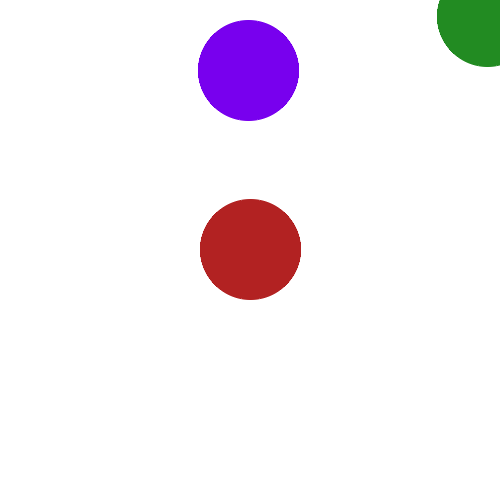

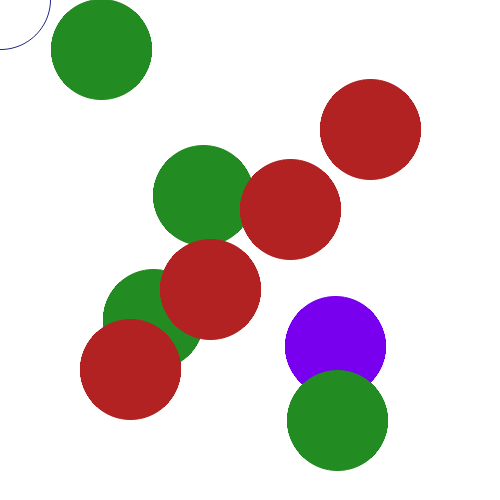

In [12]:
# The example of visualizing the saved test GIFs
from IPython.display import display, Image
if skip_training == False:
# Display the GIF in Jupyter
    display(Image(filename="imgs/easy_env.gif"))
    display(Image(filename="imgs/difficult_env.gif"))


## Task 3: Plot the algorithm's performance in each environment


- **DDPG Easy**:
  - `results/SandingEnvEasy/ddpg/logging/figure_statistical_SandingEnvEasy.pdf`
  - `results/SandingEnvEasy/ddpg_extension/logging/figure_statistical_SandingEnvEasy.pdf`
- **DDPG Middle**:
  - `results/SandingEnvMiddle/ddpg/logging/figure_statistical_SandingEnvMiddle.pdf`
  - `results/SandingEnvMiddle/ddpg_extension/logging/figure_statistical_SandingEnvMiddle.pdf`
- **DDPG Difficult**:
  - `results/SandingEnvDifficult/DDPG/logging/figure_statistical_SandingEnvDifficult.pdf`
  - `results/SandingEnvDifficult/DDPG_extension/logging/figure_statistical_SandingEnvDifficult.pdf`

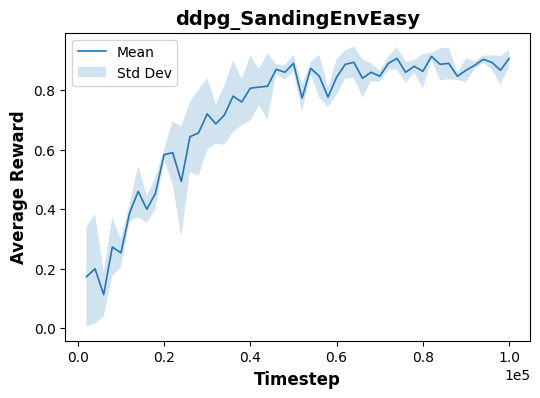

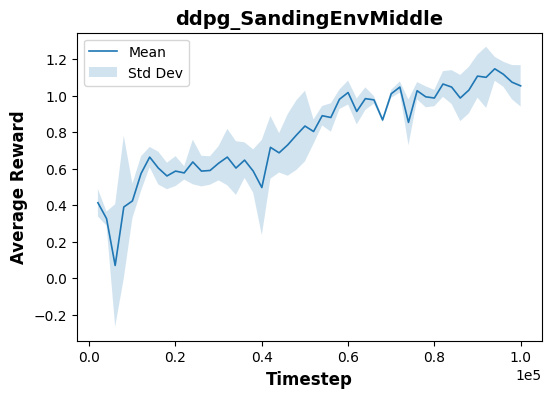

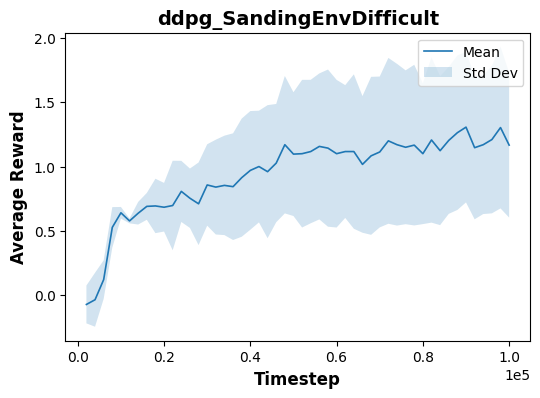

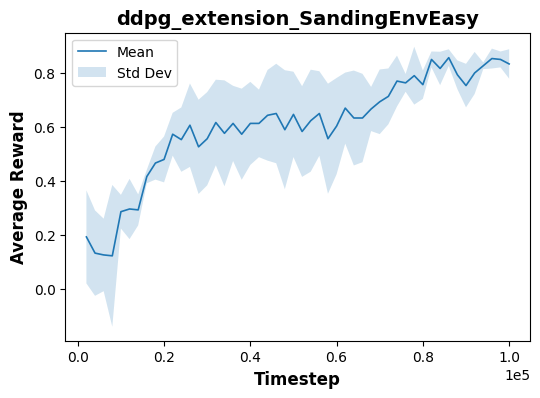

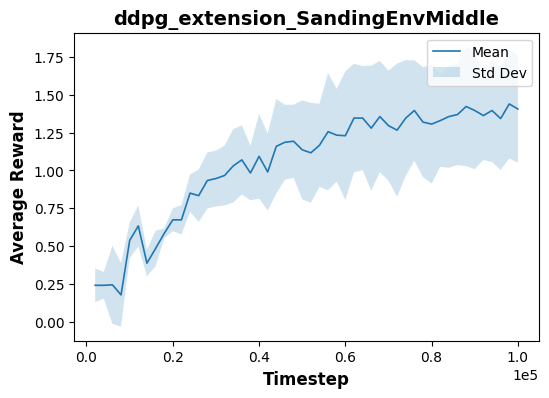

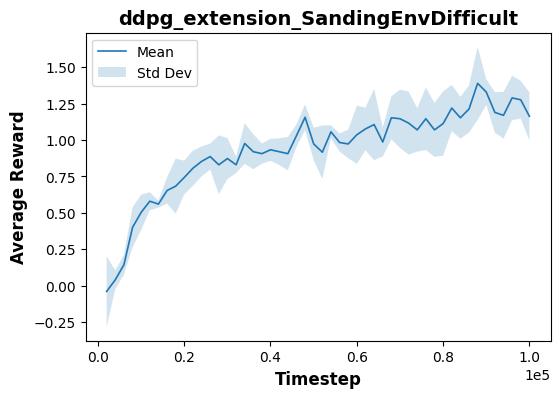

In [14]:
import warnings
warnings.filterwarnings('ignore')
if skip_training == False:
    # Uncomment the algorithm you chose
    for implemented_algo in ['ddpg', 'ddpg_extension']:
        # Loop over the three difficulty levels
        for environment in ['easy', 'middle', 'difficult']:

            training_seeds = []
            for i in range(3):
                config = setup(algo=implemented_algo, env=environment)

                config["seed"] = i
                training_seeds.append(i)

                if config["args"].algo_name == 'ddpg':
                    agent = DDPGAgent(config)

                elif config["args"].algo_name == 'ddpg_extension':
                    agent = DDPGExtension(config)
                else:
                    raise Exception('Please use ddpg!')

            # plot the statistical training curves with specific random seeds
            cu.plot_algorithm_training(
                agent.logging_dir, training_seeds, agent.env_name, implemented_algo)

The following cells are used for testing.

In [15]:
# Function to test a trained policy
def grading_test(agent, env_name, algo_name):
    # Load model
    agent.load_model()
    returns = []
    rng = np.random.default_rng(42)

    for ep in range(agent.cfg.test_episodes):
        seed = rng.integers(low=1, high=1000)
        observation, _ = agent.env.reset(seed=int(seed))
        test_reward, test_len, done = 0, 0, False


        while not done and test_len < agent.cfg.max_episode_steps:
            action, _ = agent.get_action(observation, evaluation=True)
            observation, reward, done, truncated, info = agent.env.step(action.flatten())
            test_reward += reward
            test_len += 1
        returns.append(test_reward)
    return returns


Compares the performance of your algorithm with the baseline in order to check that there is no statistical significant difference.

In [16]:
warnings.filterwarnings('ignore')

environment = 'easy'

def test_task1_1():
    baseline_test_returns = []

    for i in range(3):
        config=setup(algo=algorithm_implemented, env=environment, render=False)
        config["seed"] = i
        if config["args"].algo_name == 'ddpg':
            agent=DDPGAgent(config)
        else:
            raise Exception('Please use ddpg!')

        baseline_test_returns.append(np.sum(grading_test(agent, environment, algorithm_implemented))/agent.cfg.test_episodes)

    if algorithm_implemented == 'ddpg':
        ddpg_easy_baseline_target =  np.array([ 0.83, 0.792, 0.804,  0.654, 0.562, 0.8, 0.888, 0.714, 0.724, 0.774])
        better_performance = np.mean(baseline_test_returns) > np.mean(ddpg_easy_baseline_target)
        assert not cu.test_significant_difference(ddpg_easy_baseline_target, np.array(baseline_test_returns), 0.05) or better_performance


test_task1_1()

Loading model: /content/results/SandingEnvEasy/ddpg/model/model_parameters_0.pt
Loading model: /content/results/SandingEnvEasy/ddpg/model/model_parameters_1.pt
Loading model: /content/results/SandingEnvEasy/ddpg/model/model_parameters_2.pt


In [17]:
import pickle
from algo.ddpg_extension_further import DDPGExtensionFurther
if skip_training == False:
    training_seeds = []
    difficult_test_returns = []
    implemented_algo = 'ddpg_extension'
    for i in range(3):
        config = setup(algo=implemented_algo, env=environment)

        config["seed"] = i
        training_seeds.append(i)

        if config["args"].algo_name == 'ddpg_extension':
            agent = DDPGExtension(config)
        elif config["args"].algo_name == 'ddpg_extension_further':
            agent = DDPGExtensionFurther(config)
        else:
            raise Exception('Please use ddpg!')

        # Test the agent in the selected environment
        difficult_test_returns.append(
            np.mean(test(agent, environment, implemented_algo))/agent.cfg.test_episodes)

    with open('results/competition_returns.pkl', 'wb') as f:
        pickle.dump(difficult_test_returns, f)

Loading model: /content/results/SandingEnvEasy/ddpg_extension/model/model_parameters_0.pt
Testing...
Saved GIF to /content/results/SandingEnvEasy/ddpg_extension/video/test/_seed_0_ep_0.gif
Saved GIF to /content/results/SandingEnvEasy/ddpg_extension/video/test/_seed_0_ep_100.gif
Saved GIF to /content/results/SandingEnvEasy/ddpg_extension/video/test/_seed_0_ep_200.gif
Saved GIF to /content/results/SandingEnvEasy/ddpg_extension/video/test/_seed_0_ep_300.gif
Saved GIF to /content/results/SandingEnvEasy/ddpg_extension/video/test/_seed_0_ep_400.gif
Average test reward over 500 episodes: 0.826,+- 0.3843487999200726;         Average episode length: 20.0
Loading model: /content/results/SandingEnvEasy/ddpg_extension/model/model_parameters_1.pt
Testing...
Saved GIF to /content/results/SandingEnvEasy/ddpg_extension/video/test/_seed_1_ep_0.gif
Saved GIF to /content/results/SandingEnvEasy/ddpg_extension/video/test/_seed_1_ep_100.gif
Saved GIF to /content/results/SandingEnvEasy/ddpg_extension/video/t

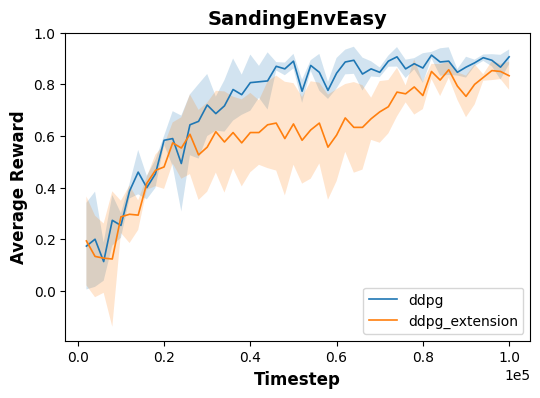

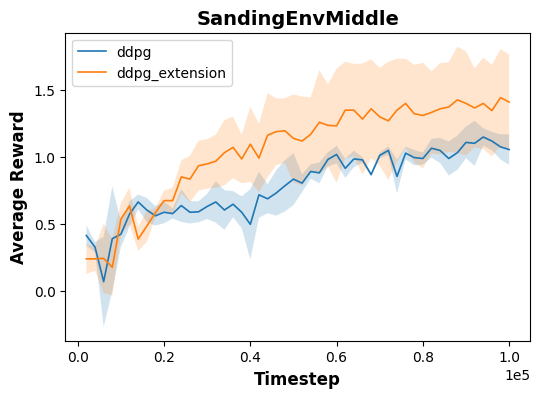

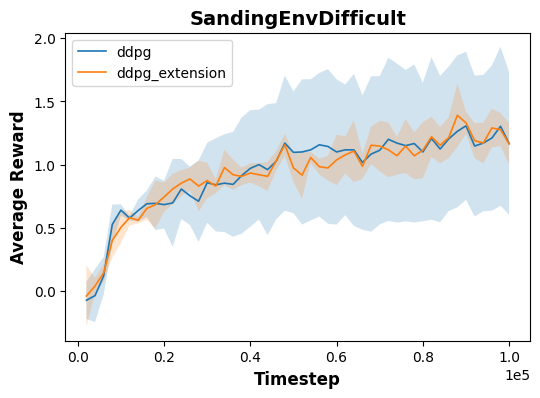

In [6]:
# Run the following code to draw the comparison plots of DDPG's training performances
import warnings
warnings.filterwarnings('ignore')

if skip_training == False:
    for environment in ['easy', 'middle', 'difficult']:
        orgin_algo_name = 'ddpg'
        improved_alo_name = 'ddpg_extension'
        improved_ao_name = 'ddpg_extension_further'
        config = setup(algo=orgin_algo_name, env=environment)
        origin_agent = DDPGAgent(config)

        config = setup(algo=improved_alo_name, env=environment)
        improved_agent = DDPGExtension(config)

        config = setup(algo=improved_ao_name, env=environment)
        improved_agent_further = DDPGExtensionFurther(config)
        # make the comparison plot
        cu.compare_algorithm_training(
            origin_agent, improved_agent, seeds=[0, 1, 2])